# 5장 서포트 벡터 머신

## 5.1 선형 SVM 분류

### 5.1.1 소프트 마진 분류

하드 마진 분류: 모든 샘플이 도로 바깥쪽에 올바르게 분류 
### 
데이터가 선형적으로 구분될 수 있어야 제대로 작동, 이상치에 민감함 

소프트 마진 분류: 도로의 폭을 가능한 한 넓게 유지하는 것과 마진 오류 사이에 적절한 균형

In [1]:
## 붓꽃 데이터셋을 적재하고, 특성 스케일을 변경하고, Iris-Vriginia 품종을 감지하기 위해 선형 SVM 모델을 훈련 
## C=1과 잠시 후에 설명할 힌지 손실함수를 적용한 LinearSVC 클래스를 사용한다. 
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # 꽃잎 길이, 꽃잎 너비 
y = (iris["target"]==2).astype(np.float64) # Iris-virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5,1.7]])

array([1.])

#### LinearSVC 클래스를 대신 선형 커널을 사용하는 SVC클래스로 대체할 수 있다.
#### SVC모델을 만들 때 SVC(kernal="linear", C=1)라고 쓴다. 
#### 또 다른 방법은 SGDClassifier(loss="hinge", alpha=1/(m*C))^4와 같이 SGDClassifier모델을 사용하는 것이다.

### 5.2 비선형 SVM 분류

비선형 데이터셋을 다루는 한 가지 방법은 다항 특성과 같은 특성을 추가하는 것

In [3]:
## 사이킷런을 사용하여 이를 구현하려면 (4.3절 '다항회귀'에서 소개한) PolynomialFeatures변환기와
## StandardScaler, LinearSVC를 연결하여 Pipeline을 만든다. 
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svc_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

C:\Users\renelee\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svc_clf', LinearSVC(C=10, loss='hinge'))])

### 5.2.1 다항식 커널

커널 트릭 : 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있음

In [5]:
from sklearn.svm import SVC
poly_kernal_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) # 3차 다항식 커널 사용해 SVM분류기를 훈련 
])
poly_kernal_svm_clf.fit(X,y)

## 과대적합이라면 다항식의 차수를 줄여야 하고 과소적합이면 차수를 늘려야 함 
## 매개변수 coef0은 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절한다. 

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### 5.2.2 유사도 특성 

비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가하는 것 
### 
랜드마크를 선택하는 방법: 데이터셋에 있는 모든 샘플 위치에 랜드마크 설정. 이렇게 하면 차원이 매우 커지고 따라서 변환된 훈련 세트가 선형적으로 구분될 가능성이 높음. 단점은 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환된다는 것. 훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 만들어짐.

### 5.2.3 가우시안 RBF 커널

다항 특성 방식과 마찬가지로 유사도 특성 방식도 머신러닝 알고리즘에 유용하게 사용될 수 있다. 추가 특성을 모두 계산하려면 연산 비용이 많이 드는데 특히 훈련세트가 클 경우 더 그렇다. 여기서 커널 트릭이 한 번 더 SVM의 마법을 만든다. 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 얻을 수 있다. 

In [6]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

gamma를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아진다. 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어진다. 반대로 작은 gamma 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워진다. 결국 하이퍼파라미터 감마가 규제의 역할을 한다. 모델이 과대적합일 경우엔 감소시켜야 하고 과소적합일 경우엔 증가시켜야 한다.

##### 경험적으로 선형 커널을 가장 먼저 시도하는 것이 좋다. (LinearSVC가 SVC("linear")보다 훨씬 빠르다. 특히 훈련 세트가 아주 크거나 특성 수가 많을 경우에 그렇다. 훈련세트가 너무 크지 않다면 가우시안 RBF커널도 시도해보면 좋다. 대부분의 경우 이 커널이 잘 들어맞는다.

### 5.2.4 계산 복잡도

LinearSVC 파이썬 클래스는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 한다. 이 라이브러리는 커널 트릭을 지원하지 않지만 훈련 샘플과 특성 수에 거의 선형적으로 늘어난다. 
#### 
SVC는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 한다. 이는 훈련 샘플 수가 커지면 엄청나게 느려진다. 
#### 
특성의 개수에는 희소 특성인 경우에는 잘 확장된다. 이런 경우 알고리즘의 성능이 샘플이 가진 0이 아닌 특성의 평균 수에 거의 비례한다.

## 5.3 SVM 회귀

In [7]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [8]:
## SVR은 SVC의 회귀 버전이고 LinearSVR은 LinearSVC의 회귀 버전이다. LinearSVR은 필요한 시간이 훈련 세트의 크기에
## 비례해서 선형적으로 늘어난다. 하지만 SVR은 훈련 세트가 커지면 훨씬 느려진다. 
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

## 5.4 SVM 이론

### 5.4.1 결정 함수와 예측

선형 SVM 분류기를 훈련한다는 것은 마진 오류를 하나도 발생하지 않거나(하드 마진) 제한적인 마진 오류를 가지면서(소프트 마진) 가능한 한 마진을 크게 하는 w와 b를 찾는 것이다. 

### 5.4.2 목적 함수

결정 함수의 기울기를 생각해보면 이는 가중치 벡터의 노름 ||w||와 같다. 이 기울기를 2로 나누면 결정 함수의 값이 +-1이 되는 점들이 결정 경계로부터 2배만큼 더 멀어진다. 즉 기울기를 2로 나누는 것은 마진에 2를 곱하는 것과 같다. 마진을 크게 하기 위해 ||w||를 최소화하려고 한다. 마진 오류를 하나도 만들지 않으려면(하드 마진), 결정 함수가 모든 양성 훈련 샘플에서는 1보다 커야 하고 음성 훈련 샘플에서는 -1보다 작아야 한다. 음성 샘플(y=0)일 때 t=-1로, 양성 샘플(y=1)일 때 t=1로 정의하면 앞서 말한 제약 조건을 모든 샘플에서 t(wx+b)=>1로 표현할 수 있다.

소프트 마진 분류기의 목적 함수를 구성하려면 각 샘플에 대해 슬랙 변수 제타=>0을 도입해야 한다. 제타는 i번째 샘플이 얼마나 마진을 위반할지 정한다. 1) 마진 오류를 최소화하기 이해 가능한 한 슬랙 변수의 값을 작게 만드는 것, 2) 마진을 크게 하기 위해 1/2w^Tw를 가능한 한 작게 만드는 것 -> 여기서 하이퍼파라미터 C가 등장함 

### 5.4.3 콰드라틱 프로그래밍

하드 마진과 소프트 마진 문제는 모두 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제이다. 이런 문제를 콰드라틱 프로그래밍(quadratic programming)문제라고 한다. 

하드 마진 선형 SVM분류기를 훈련시키는 한 가지 방법은 이미 준비되어 있는 QP 알고리즘에 관련 파라미터를 전달하는 것. 결과 벡터 p는 편향 b=p_0와 특성 가중치 w=p을 담고 있다. 비슷하게 소프트 마진 문제에서도 QP 알고리즘을 사용할 수 있다. 커널 트릭을 사용하려면 제약이 있는 최적화 문제를 다른 형태로 바꿔야 한다. 

### 5.4.4 쌍대 문제

원 문제라는 제약이 있는 최적화 문제가 주어지면 쌍대 문제라고 하는 깊게 관련된 다른 문제로 표현할 수 있다. 일반적으로 쌍대 문제 해는 원 문제 해의 하한값이지만, 어떤 조건하에서는 원 문제와 똑같은 해를 제공한다. -> SVM 문제는 이 조건을 만족시킨다. 따라서 원문제 또는 쌍대문제 중 하나를 선택하여 풀 수 있다. 둘 다 같은 해를 제공한다. 

훈련 샘플 수가 특성 개수보다 작을 때 원 문제보다 쌍대 문제를 푸는 것이 더 빠르다. 더 중요한 것은 원 문제에서는 적용이 안되는 커널 트릭을 가능하게 한다. 

### 5.4.5 커널 SVM

머신러닝에서 커널은 변환 파이를 계산하지 않고(또는 파이를 모르더라도) 원래 벡터 a와 b에 기반하여 점곱을 계산할 수 있는 함수이다. 

예측을 만드는 데는 전체 샘플이 아니라 서포트 벡터와 새입력 벡터 간의 점곱만 계산하면 된다. 물론 편향도 커널 트릭을 사용해 계산해야 한다. 

### 5.4.6 온라인 SVM

온라인 학습은 새로운 샘플이 생겼을 때 점진적으로 학습하는 것을 의미한다. 
온라인 SVM 분류기를 구현하는 한 가지 방법은 원 문제로부터 유도된 비용 함수를 최소화하기 위한 경사 하강법을 사용하는 것이다. (예를 들면 SGDClassifier를 사용한다.) 하지만 경사하강법은 QP기반의 방법보다 훨씬 느리게 수렴한다. 

#### 힌지 손실

max(0,1-t) 함수를 힌지 손실 함수라고 부른다. t=1에서 미분 가능하지 않지만, 라쏘 회귀처럼 t=1에서 서브그레이디언트를 사용해 경사 하강법을 사용할 수 있다. 

In [12]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

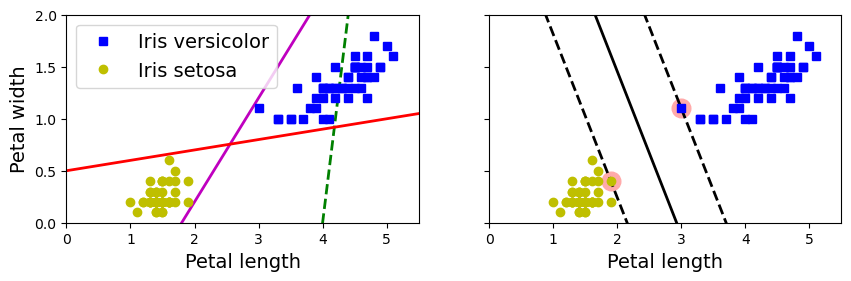

In [14]:
import matplotlib.pyplot as plt
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])


plt.show()

(-2.0, 2.0, -2.0, 2.0)

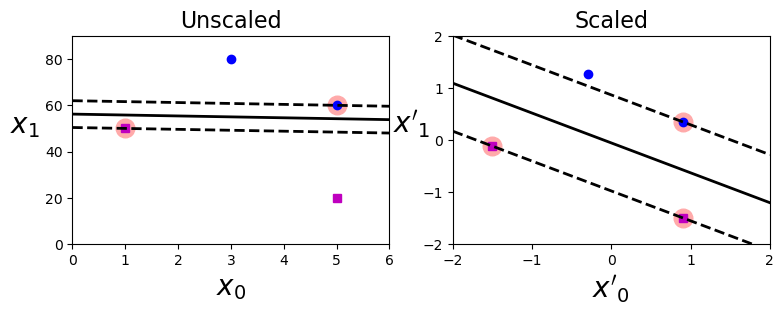

In [15]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])